In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
import xgboost as xgb
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
data = pd.read_excel("../Dataset.xlsx", sheet_name=['Weather', 'Total Consumers'])
data.keys()


dict_keys(['Weather', 'Total Consumers'])

In [4]:
df_weather = data['Weather']
df_tc = data['Total Consumers']
df_weather


,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,2019-01-01 00:15:00.000,8,4,1030,5,7,76,0,0,0
1,2019-01-01 00:30:00.000,8,4,1030,3,6,76,0,0,0
2,2019-01-01 00:45:00.000,8,4,1030,4,6,78,0,0,0
3,2019-01-01 01:00:00.000,8,4,1030,3,6,78,0,0,0
4,2019-01-01 01:15:00.000,8,4,1030,2,8,78,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35034,NaN,0,0,0,0,0,0,0,0,0
35035,NaN,0,0,0,0,0,0,0,0,0
35036,NaN,0,0,0,0,0,0,0,0,0
35037,NaN,0,0,0,0,0,0,0,0,0


In [5]:
df_weather.isnull().sum()


datetime                  22953
TemperatureC                  0
DewpointC                     0
PressurehPa                   0
WindSpeedKMH                  0
WindSpeedGustKMH              0
Humidity                      0
HourlyPrecipMM                0
dailyrainMM                   0
SolarRadiationWatts_m2        0
dtype: int64

In [6]:
df_tc

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2.964,2.322959,1.544607,0.778310,1.962012,2.677445,0.237877,0.689194,0.358525,0.814643,...,0.898895,0.203825,0.221624,0.319531,0.830996,0.924987,0.219128,0.274880,0.990488,0.779475
1,2.584,2.371797,1.544607,0.778310,1.962012,2.733737,0.192929,0.558967,0.358525,0.660712,...,0.917793,0.165311,0.179747,0.319531,0.848467,0.944434,0.177722,0.222940,1.011313,0.795863
2,3.071,2.415961,1.319880,0.665072,1.676555,2.784640,0.382869,1.109272,0.377198,1.311186,...,0.934883,0.328060,0.356708,0.336174,0.864266,0.962019,0.352691,0.442426,1.030144,0.810682
3,2.694,2.302538,1.319880,0.665072,1.676555,2.653908,0.442052,1.280743,0.377198,1.513868,...,0.890992,0.378772,0.411848,0.336174,0.823691,0.916855,0.407209,0.510816,0.981781,0.772623
4,2.569,2.363063,0.913154,0.460128,1.159919,2.723669,0.192242,0.556976,0.668500,0.658358,...,0.914413,0.164722,0.179106,0.595793,0.845343,0.940956,0.177089,0.222146,1.007588,0.792932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,1.664,2.244719,1.455982,0.733653,1.849437,2.587266,0.205654,0.595835,0.171793,0.704291,...,0.868619,0.176214,0.191602,0.153109,0.803007,0.893832,0.189444,0.237645,0.957128,0.753222
35132,1.659,2.136340,1.201186,0.605264,1.525786,2.462348,0.201219,0.582985,0.067223,0.689101,...,0.826680,0.172414,0.187470,0.059912,0.764237,0.850676,0.185359,0.232519,0.910916,0.716855
35133,1.664,2.192805,1.201186,0.605264,1.525786,2.527430,0.228585,0.662271,0.067223,0.782819,...,0.848530,0.195862,0.212966,0.059912,0.784436,0.873160,0.210568,0.264142,0.934992,0.735802
35134,1.697,1.446083,0.259545,0.130782,0.329682,1.666757,0.189302,0.548459,0.070958,0.648292,...,0.559578,0.162203,0.176368,0.063241,0.517310,0.575820,0.174381,0.218749,0.616596,0.485237


In [7]:
df_energy = df_tc[0]
df_energy = pd.DataFrame(df_energy)
df_energy.columns = ['Energy']
df_energy

,Energy
0,2.964
1,2.584
2,3.071
3,2.694
4,2.569
...,...
35131,1.664
35132,1.659
35133,1.664
35134,1.697


# Data description and visualization

In [8]:
df_weather.describe()

,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
count,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000
mean,4.407603,2.634864,351.724222,2.159451,4.580410,25.299352,0.031679,0.396530,54.006678
std,6.580961,4.152532,484.738175,4.197206,8.299569,36.329449,0.402516,2.217243,158.496986
min,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,6.000000,1016.000000,3.000000,6.000000,65.000000,0.000000,0.000000,0.000000
max,31.000000,16.000000,1035.000000,38.000000,58.000000,96.000000,17.000000,28.000000,1013.000000


In [9]:
df_energy.describe()

,Energy
count,35136.000000
mean,3.651607
std,3.593802
min,0.000000
25%,2.660000
50%,3.043000
75%,3.889000
max,49.256000


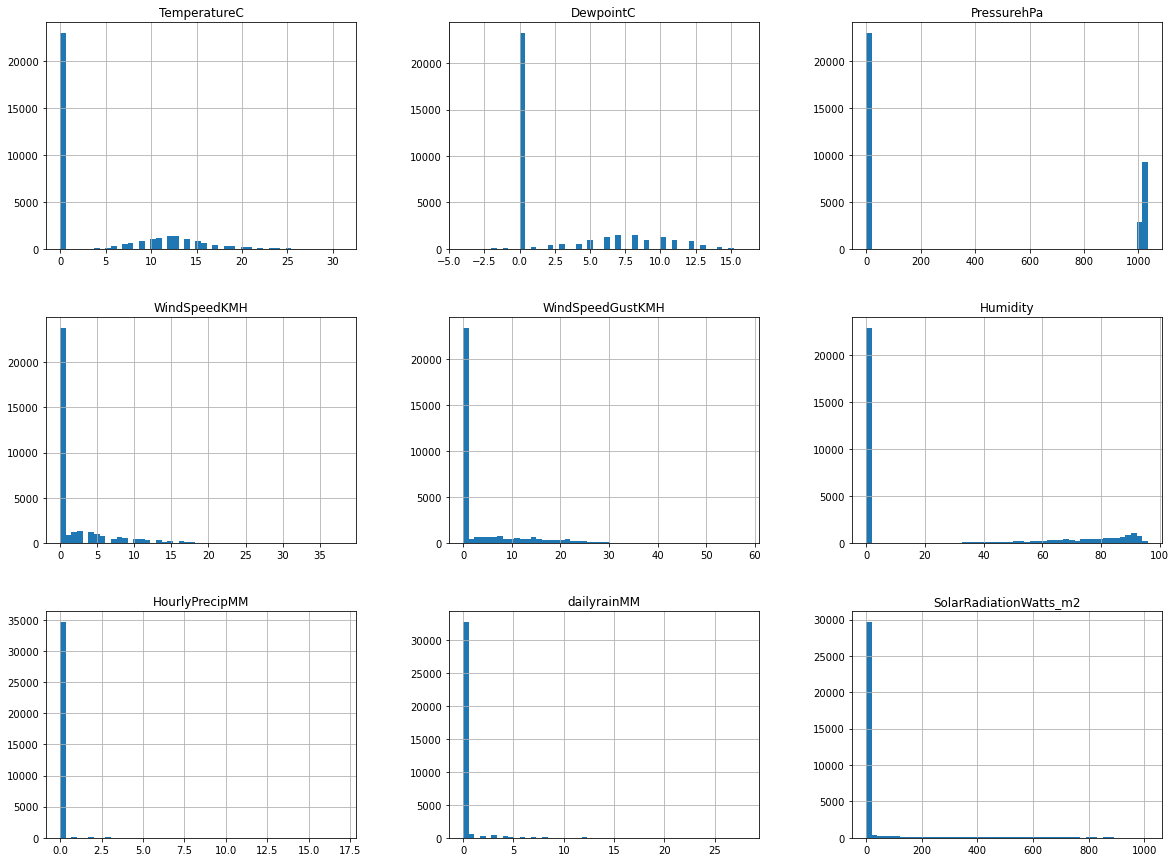

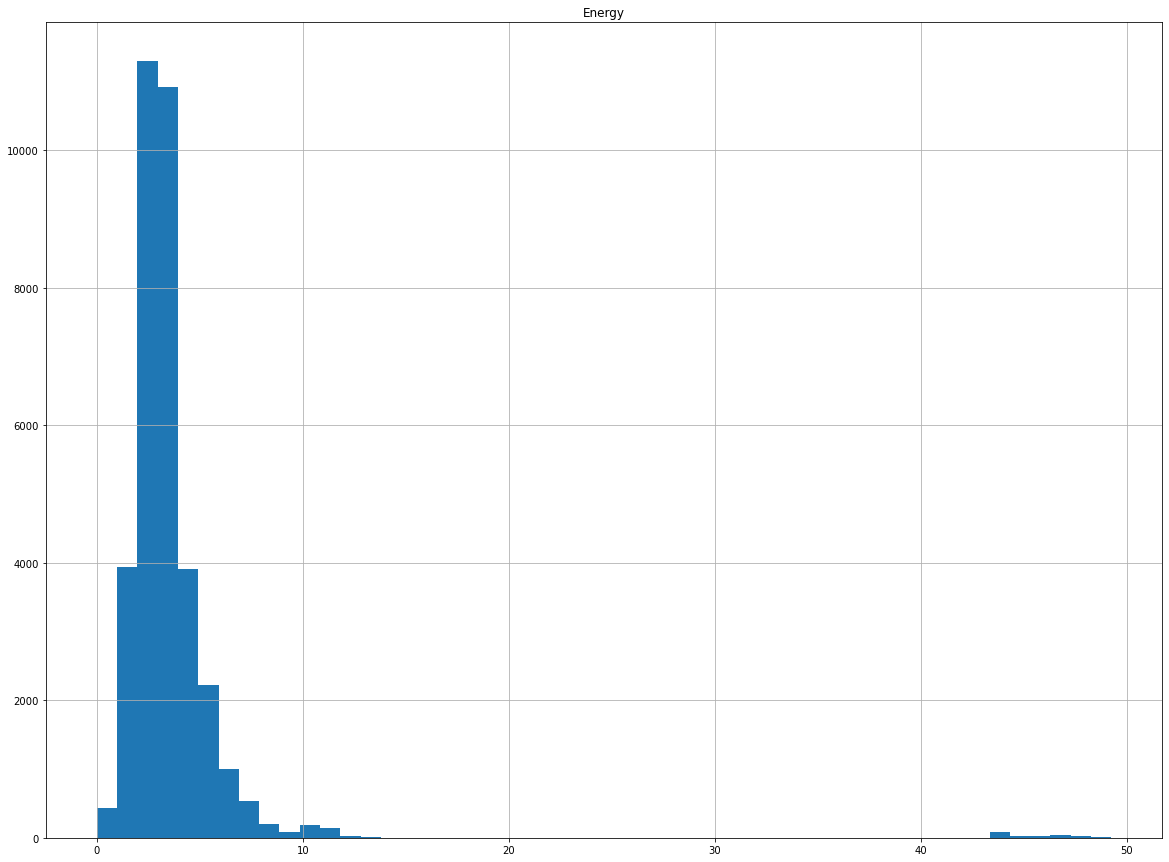

In [10]:
df_weather.hist(bins=50, figsize=(20,15))
plt.show()

df_energy.hist(bins=50, figsize=(20,15))
plt.show()

## Plot some data

In [31]:
# merge the energy and weather dataframes
df = pd.merge(df_energy, df_weather, left_index=True, right_index=True)
# Drop NaN values from weather dataset
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Energy,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,2.964,2019-01-01 00:15:00.000,8,4,1030,5,7,76,0,0,0
1,2.584,2019-01-01 00:30:00.000,8,4,1030,3,6,76,0,0,0
2,3.071,2019-01-01 00:45:00.000,8,4,1030,4,6,78,0,0,0
3,2.694,2019-01-01 01:00:00.000,8,4,1030,3,6,78,0,0,0
4,2.569,2019-01-01 01:15:00.000,8,4,1030,2,8,78,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12081,3.115,2019-05-17 23:00:00.000,12,8,1017,11,19,76,0,0,0
12082,2.596,2019-05-17 23:15:00.000,12,8,1016,11,17,76,0,0,0
12083,2.903,2019-05-17 23:30:00.000,12,8,1016,4,12,76,0,0,0
12084,2.789,2019-05-17 23:45:00.000,12,8,1016,3,14,76,0,0,0


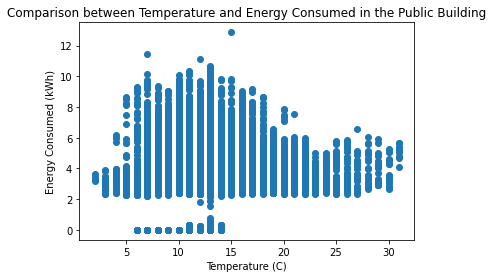

In [12]:
plt.scatter(df_weather['TemperatureC'], df_energy[0:df_weather['TemperatureC'].shape[0]])
plt.xlabel('Temperature (C)') 
plt.ylabel('Energy Consumed (kWh)')
plt.title('Comparison between Temperature and Energy Consumed in the Public Building')
plt.show()

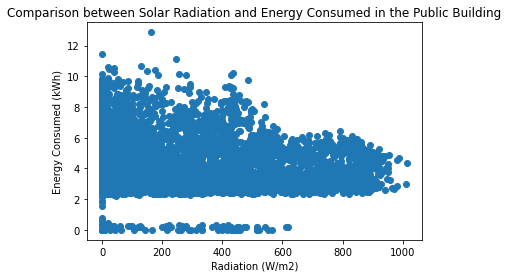

In [13]:
plt.scatter(df_weather['SolarRadiationWatts_m2'], df_energy[0:df_weather['TemperatureC'].shape[0]])
plt.xlabel('Radiation (W/m2)') 
plt.ylabel('Energy Consumed (kWh)')
plt.title('Comparison between Solar Radiation and Energy Consumed in the Public Building')
plt.show()

# Statistical analysis

## Correlation matrix

In [28]:
df_energy = pd.DataFrame(df_energy, columns=['Energy'])
df_merged = pd.concat([df_energy, df_weather], axis=1)
corr=df_merged.corr()
#sns.heatmap(corr,cmap='coolwarm',annot=True)

,Energy,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,2.964,2019-01-01 00:15:00.000,8.0,4.0,1030.0,5.0,7.0,76.0,0.0,0.0,0.0
1,2.584,2019-01-01 00:30:00.000,8.0,4.0,1030.0,3.0,6.0,76.0,0.0,0.0,0.0
2,3.071,2019-01-01 00:45:00.000,8.0,4.0,1030.0,4.0,6.0,78.0,0.0,0.0,0.0
3,2.694,2019-01-01 01:00:00.000,8.0,4.0,1030.0,3.0,6.0,78.0,0.0,0.0,0.0
4,2.569,2019-01-01 01:15:00.000,8.0,4.0,1030.0,2.0,8.0,78.0,0.0,0.0,0.0


## Correlation matrix with output variable

In [15]:
cor_taget = abs(corr["Energy"])

## Selecting highly correlated features

In [16]:
relevant_features = cor_taget[cor_taget>0.5]
relevant_features

Energy    1.0
Name: Energy, dtype: float64

# Data preprocessing

## Data normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()



## Feature selection

In [18]:
X = df_weather[['TemperatureC', 'SolarRadiationWatts_m2']]
y = df_energy['Energy']

## Dimensionality reduction (PCA)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X = pca.fit_transform(X)

### Check the explained variance ratio

In [20]:
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

Explained Variance Ratio:  [0.99977389]


## Auxiliary functions

In [21]:
def build_model(X_train: np.array, y_train: np.array, X_test: np.array, algorithm):
    
    model = algorithm
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return model, preds


def plot_results(preds: np.array, actuals: np.array, title: str):
    
    plt.scatter(actuals, preds, c='b', label='predicted')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.title(title)
    plt.xlim(0, plt.xlim()[1])
    plt.ylim(0, plt.ylim()[1])
    _ = plt.plot([0, 100], [0, 100], '--r', label='y=x')
    plt.legend()
    plt.show()
    
    
def performance_metrics(preds: np.array, actuals: np.array):

    # calculate performance metrics
    mse = mean_squared_error(actuals, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals, preds)
    wmape = np.sum(np.abs(preds - actuals)) / np.sum(np.abs(actuals)) * 100
    r2 = r2_score(actuals, preds)

    # print performance metrics
    print('MSE: %.4f' % mse)
    print('RMSE: %.4f' % rmse)
    print('MAE: %.4f' % mae)
    print('WMAPE: %.4f' % wmape)
    print('R2: %.4f' % r2)

### First Model (all weather features)

In [22]:
# Remove Datetime because XGB doesn't allow categorical variables
df_weather_no_date = df_weather.drop('datetime', axis=1, inplace=False)
df_weather_no_date

,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,8,4,1030,5,7,76,0,0,0
1,8,4,1030,3,6,76,0,0,0
2,8,4,1030,4,6,78,0,0,0
3,8,4,1030,3,6,78,0,0,0
4,8,4,1030,2,8,78,0,0,0
...,...,...,...,...,...,...,...,...,...
12081,12,8,1017,11,19,76,0,0,0
12082,12,8,1016,11,17,76,0,0,0
12083,12,8,1016,4,12,76,0,0,0
12084,12,8,1016,3,14,76,0,0,0


In [23]:
# Transform energy dataset to be the same size as the weather one
df_energy_new = df_energy[0:df_weather.shape[0]]
#X = df_weather_no_date
y = df_energy_new
df_energy_new

,Energy
0,2.964
1,2.584
2,3.071
3,2.694
4,2.569
...,...
12081,3.115
12082,2.596
12083,2.903
12084,2.789


## Train and Predict Models

In [24]:
#Linear Regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)
model_lr, preds_lr = build_model(X_train_lr, y_train_lr, X_test_lr, LinearRegression())

In [25]:
#Lstm
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.2, random_state=42)
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=100, verbose=0)

preds_lstm = model_lstm.predict(X_test_lstm)

NameError: name 'Sequential' is not defined

In [ ]:
#XGBoost
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)
model_xgb, preds_xgb = build_model(X_train_xgb, y_train_xgb, X_test_xgb, xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=100, verbosity=1, seed=42))

## Plot Models and Show Performance Metrics

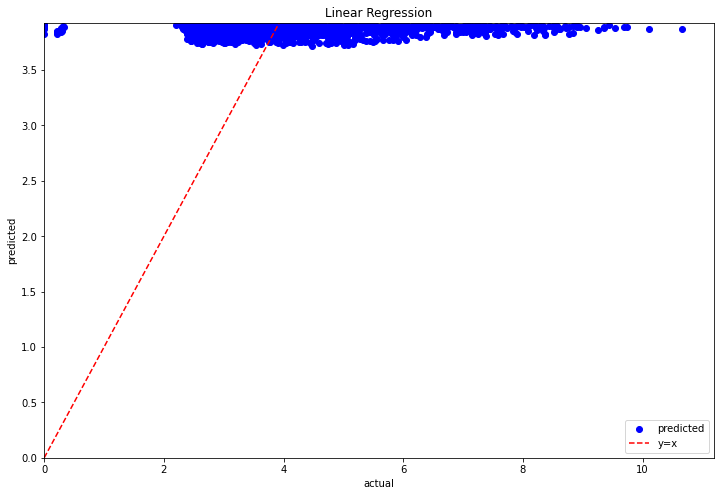

In [ ]:
plt.figure(figsize=(12, 8))

plot_results(preds_lr, y_test_lr, 'Linear Regression')

In [ ]:
print("Linear Regression Model")
performance_metrics(preds_lr, y_test_lr.values.reshape(-1))

Linear Regression Model
MSE: 2.2136
RMSE: 1.4878
MAE: 1.1364
WMAPE: 72161.6877
R2: -0.0002


In [ ]:
plt.figure(figsize=(12, 8))

plot_results(preds_lstm, y_test_lstm, 'LSTM')

NameError: name 'preds_lstm' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
print("LSTM Model")
performance_metrics(preds_lstm, y_test_lstm.values.reshape(-1))

LSTM Model


NameError: name 'preds_lstm' is not defined

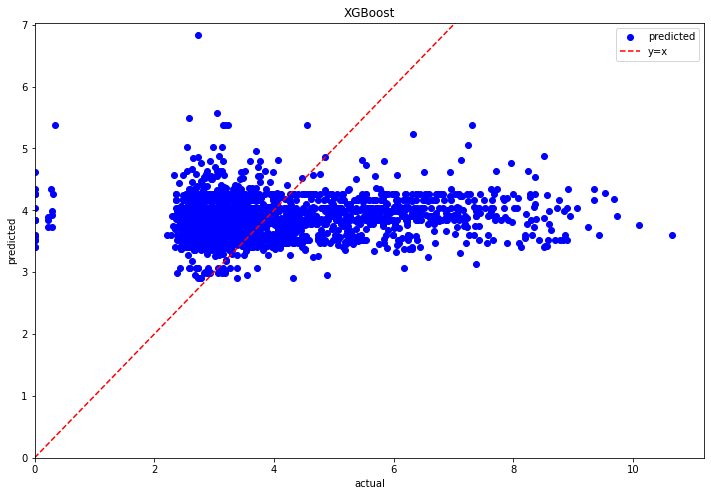

In [ ]:
plt.figure(figsize=(12, 8))

plot_results(preds_xgb, y_test_xgb, 'XGBoost')

In [ ]:
print("XGBoost Model")
performance_metrics(preds_xgb, y_test_xgb.values.reshape(-1))

XGBoost Model
MSE: 2.2163
RMSE: 1.4887
MAE: 1.1215
WMAPE: 29.4587
R2: -0.0015


## Cross Validation

In [ ]:
def cv_validate(classifier, X, y, k):
    scores = cross_validate(classifier, X, y, cv=KFold(n_splits=k, shuffle=True), scoring='neg_mean_squared_error', return_estimator=True)
    print("MSE: %0.2f +- %0.2f" % (scores['test_score'].mean(), scores['test_score'].std()))
    return scores

In [ ]:
scores = cv_validate(LinearRegression(), X_train_lr, y_train_lr, 10)

MSE: -2.34 +- 0.15


In [ ]:
scores = cv_validate(Sequential(), X_train_lstm, y_train_lstm, 10)

NameError: name 'Sequential' is not defined

In [ ]:
scores = cv_validate(xgb.XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=100, verbosity=1, seed=42), X_train_xgb, y_train_xgb, 10)

MSE: -1.27 +- 0.09
